In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [34]:
df = pd.read_csv('Eleicao.csv', sep=';')

In [36]:
df.shape

(47, 3)

In [38]:
df.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


In [40]:
x = df.iloc[:, 2].values
y = df.iloc[:,1].values
x

array([  10,  100, 1600, 1500, 3300,  200, 1800, 1700,  300, 1800,  100,
        500, 3000,   20,  200,  700, 1600, 1900,  100,  400, 2700,  200,
        300,  500, 2500, 1400,  700, 1700, 1400, 1600,  400,  200, 1600,
       2200, 1900,  200, 1200, 1700, 1500, 2100,  400,  800,  400,  500,
       1000,  300,  800], dtype=int64)

In [42]:
x = x.reshape(-1,1)
x

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]], dtype=int64)

In [44]:
# Modelo de regressão logística
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [46]:
model.coef_

array([[0.00498364]])

In [48]:
df.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


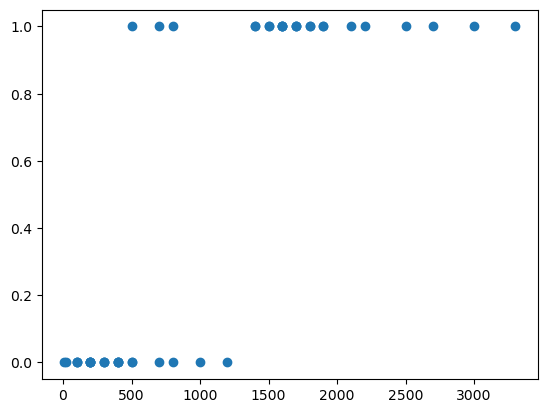

In [50]:
plt.scatter(df.DESPESAS, df.SITUACAO)

In [53]:
np.corrcoef(df.DESPESAS, df.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [55]:
model.intercept_

array([-4.60287217])

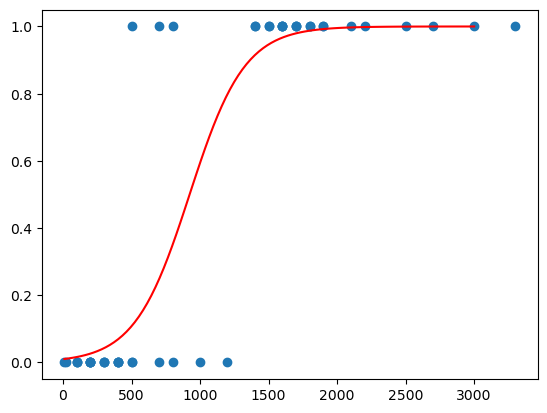

In [59]:
plt.scatter(x,y)
# Geração de novos dados para função sigmoide
x_test = np.linspace(10,3000,100)

def gen_sig(x):
    return 1 / (1 + np.exp(-x))

# Previsões
r = gen_sig(x_test * model.coef_ + model.intercept_).ravel()
plt.plot(x_test, r, color='r')

In [63]:
# Novos candidatos
df2 = pd.read_csv('NovosCandidatos.csv', sep=';')
df2

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


In [67]:
dprev = df2.iloc[:,1].values
dprev = dprev.reshape(-1,1)
dprev

array([[   0],
       [  10],
       [ 200],
       [ 500],
       [ 900],
       [1500],
       [3000]], dtype=int64)

In [71]:
model.predict(dprev)

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [161]:
prev = np.column_stack((df2, model.predict(dprev)))

In [163]:
df3 = pd.DataFrame(prev)

In [169]:
df3.rename(columns={0: 'Candidato', 1: 'Despesas', 2: 'Será eleito?'}, inplace=True)

In [171]:
df3.columns

Index(['Candidato', 'Despesas', 'Será eleito?'], dtype='object')

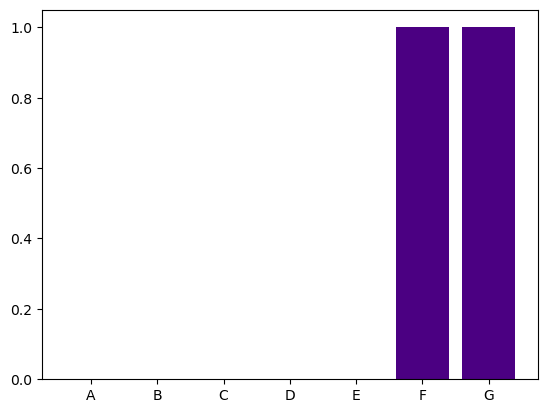

In [175]:
plt.bar(df3.Candidato, df3['Será eleito?'], color='indigo')
plt.show()